In [1]:
!pip install torch torchvision

In [2]:
import os
from PIL import Image  # Import for image processing

def FormatDataset(dataset_src, dataset_dest, classes):
    # Create destination paths for cropped and complete images
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes]
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes]
    
    # Define source paths for cropped and complete images
    cropped_src = [os.path.join(dataset_src, f"im_{cls}", f"im_{cls}", "CROPPED") for cls in classes]
    complete_src = [os.path.join(dataset_src, f"im_{cls}", f"im_{cls}") for cls in classes]
    
    # Create destination directories if they do not exist
    for dest1, dest2 in zip(new_cropped_dest, new_complete_dest):
        os.makedirs(dest1, exist_ok=True)
        os.makedirs(dest2, exist_ok=True)

    # Processing Cropped Images
    for src, new_dest in zip(cropped_src, new_cropped_dest):
        if os.path.exists(src):
            for file in os.listdir(src):
                filename, file_ext = os.path.splitext(file)
                if file_ext.lower() == '.bmp':  # Check for .bmp extension
                    img_src = os.path.join(src, file)
                    img_dest = os.path.join(new_dest, filename + '.jpg')
                    # Convert and save image as .jpg
                    try:
                        img = Image.open(img_src)
                        img.save(img_dest)
                        print(f"Converted and saved {img_src} as {img_dest}")
                    except Exception as e:
                        print(f"Error processing {img_src}: {e}")
        else:
            print(f"Source path does not exist: {src}")

    # Processing Complete Images
    for src, new_dest in zip(complete_src, new_complete_dest):
        if os.path.exists(src):
            for file in os.listdir(src):
                filename, file_ext = os.path.splitext(file)
                if file_ext.lower() == '.bmp':  # Check for .bmp extension
                    img_src = os.path.join(src, file)
                    img_dest = os.path.join(new_dest, filename + '.jpg')
                    # Convert and save image as .jpg
                    try:
                        img = Image.open(img_src)
                        img.save(img_dest)
                        print(f"Converted and saved {img_src} as {img_dest}")
                    except Exception as e:
                        print(f"Error processing {img_src}: {e}")
        else:
            print(f"Source path does not exist: {src}")

# Function to check the number of images in each class folder
def GetDatasetSize(path, classes, main="CROPPED"):
    num_of_images = {}
    for cls in classes:
        # Counting the number of files in the folder
        folder = os.path.join(path, cls, main)
        if os.path.exists(folder):
            num_of_images[cls] = len([f for f in os.listdir(folder) if f.endswith('.jpg')])
        else:
            num_of_images[cls] = 0
            print(f"Folder does not exist: {folder}")
    return num_of_images

# Source Location for Dataset
src = '../input/cervical-cancer-largest-dataset-sipakmed'
# Destination Location for Dataset
dest = './CervicalCancer'
# Image Classes
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

# Format the Dataset
FormatDataset(src, dest, classes)

# Check the dataset size after processing
print(GetDatasetSize(dest, classes, "COMPLETE"))


Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/025_01.bmp as ./CervicalCancer/Dyskeratotic/CROPPED/025_01.jpg
Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/001_01.bmp as ./CervicalCancer/Dyskeratotic/CROPPED/001_01.jpg
Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/088_03.bmp as ./CervicalCancer/Dyskeratotic/CROPPED/088_03.jpg
Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/006_04.bmp as ./CervicalCancer/Dyskeratotic/CROPPED/006_04.jpg
Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/202_01.bmp as ./CervicalCancer/Dyskeratotic/CROPPED/202_01.jpg
Converted and saved ../input/cervical-cancer-largest-dataset-sipakmed/im_Dyskeratotic/im_Dyskeratotic/CROPPED/101_07.bmp as ./CervicalC

In [3]:
root_dir = "./CervicalCancer"
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]

def GetDatasetSize(path, classes, main = "CROPPED"):
    num_of_image = {}
    for cls in classes:
        # Counting the Number of Files in the Folder
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)));
    return num_of_image;

print(GetDatasetSize(root_dir, classes, "COMPLETE"));

{'Dyskeratotic': 223, 'Koilocytotic': 238, 'Metaplastic': 271, 'Parabasal': 108, 'Superficial-Intermediate': 126}


{'Dyskeratotic': 223, 'Koilocytotic': 238, 'Metaplastic': 271, 'Parabasal': 108, 'Superficial-Intermediate': 126}


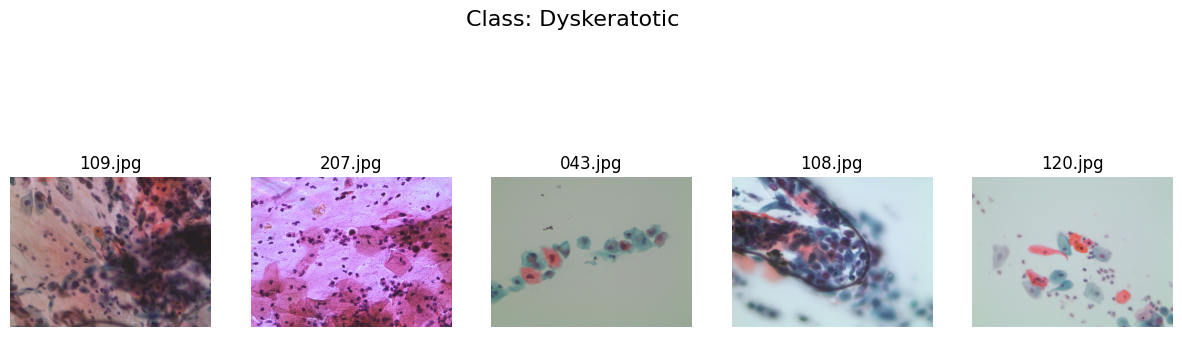

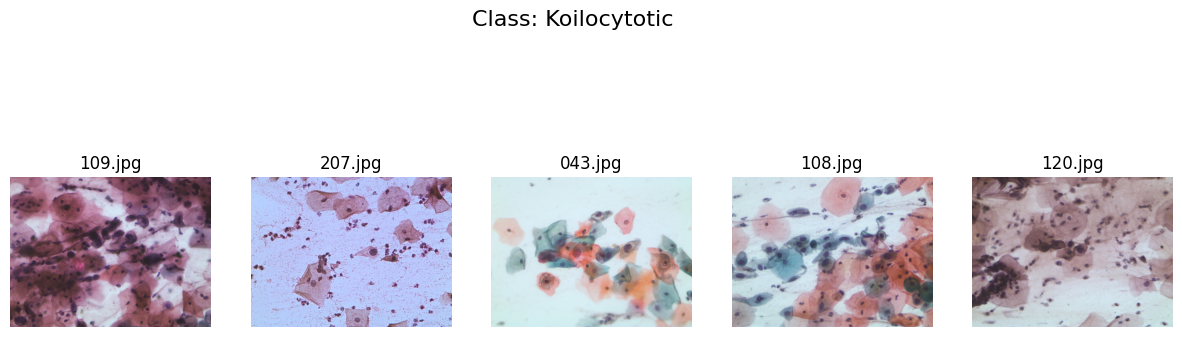

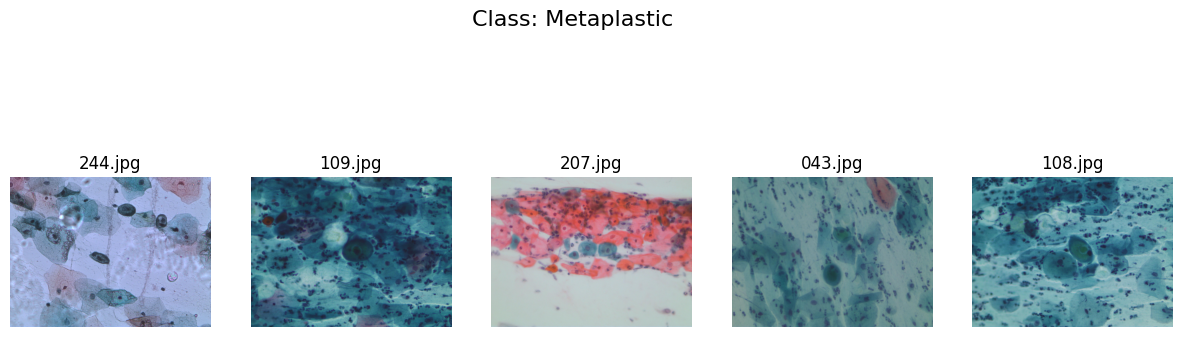

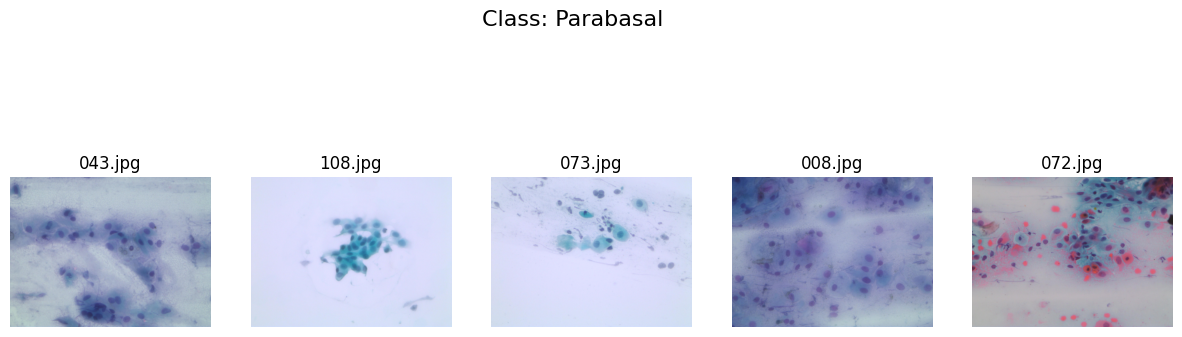

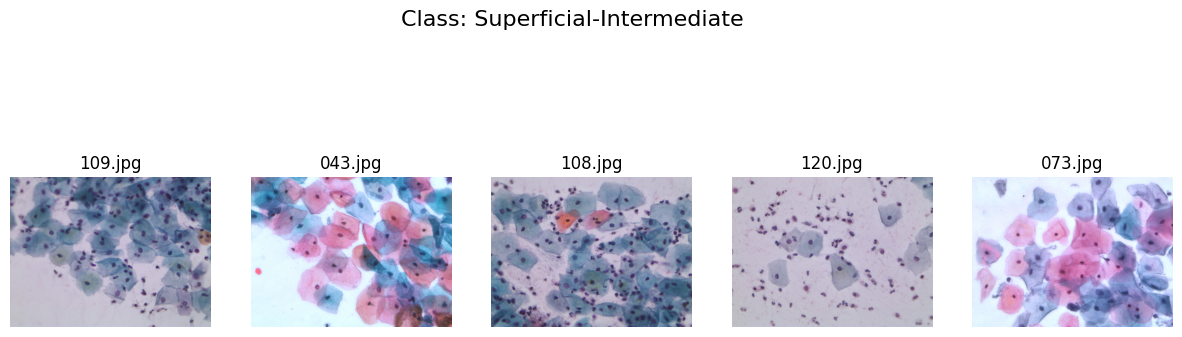

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

root_dir = "./CervicalCancer"
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

def GetDatasetSize(path, classes, main="CROPPED"):
    num_of_image = {}
    for cls in classes:
        # Counting the number of files in the folder
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)))
    return num_of_image

def DisplayImages(path, classes, main="CROPPED", images_per_class=5):
    for cls in classes:
        folder_path = os.path.join(path, cls, main)
        images = os.listdir(folder_path)
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Class: {cls}", fontsize=16)
        for i, img_name in enumerate(images[:images_per_class]):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            plt.subplot(1, images_per_class, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(img_name)
        plt.show()

# Display dataset size
dataset_size = GetDatasetSize(root_dir, classes, "COMPLETE")
print(dataset_size)

# Display images
DisplayImages(root_dir, classes, "COMPLETE", images_per_class=5)

from torch.utils.data import DataLoader

In [5]:
from torchvision import datasets, transforms

In [6]:
!pip install pydicom albumentations

In [7]:
import albumentations as A

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [8]:
from albumentations.pytorch import ToTensorV2

In [9]:
transform = A.Compose([
    A.Resize(224,224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

In [10]:
import os

In [11]:
import shutil


In [12]:
!git clone https://github.com/microsoft/Swin-Transformer

fatal: destination path 'Swin-Transformer' already exists and is not an empty directory.


In [13]:
%cd Swin-Transformer

/kaggle/working/Swin-Transformer


In [14]:
import os

# Print the current working directory
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

# List contents of the current working directory
print("Contents:", os.listdir(current_directory))


Current Working Directory: /kaggle/working/Swin-Transformer
Contents: ['MODELHUB.md', '.git', 'main.py', 'SUPPORT.md', 'Swin-Transformer', '.gitignore', 'val_data.csv', 'SECURITY.md', 'main_moe.py', 'main_simmim_ft.py', 'optimizer.py', 'config.py', 'train_data.csv', 'figures', 'LICENSE', 'data', 'utils.py', 'CervicalCancer', 'kernels', 'models', 'lr_scheduler.py', 'CODE_OF_CONDUCT.md', 'main_simmim_pt.py', 'utils_simmim.py', 'utils_moe.py', 'configs', 'logger.py', 'state.db', 'get_started.md', 'README.md']


In [15]:
print("Current working directory:", os.getcwd())



Current working directory: /kaggle/working/Swin-Transformer


In [16]:
# Check the parent directory of your current working directory
print("Parent directory contents:", os.listdir("/kaggle/working"))


Parent directory contents: ['Swin-Transformer', 'CervicalCancer', '.virtual_documents', 'state.db']


In [17]:
# Update the path to the CervicalCancer directory
cervical_cancer_dir = "/kaggle/working/CervicalCancer"

# Check if the CervicalCancer directory exists and list its contents
if os.path.exists(cervical_cancer_dir):
    print("CervicalCancer directory found. Listing contents:")
    for class_name in os.listdir(cervical_cancer_dir):
        class_dir = os.path.join(cervical_cancer_dir, class_name)
        print(f"Class: {class_name}")
        if os.path.isdir(class_dir):  # Check if it's a directory
            print("Contents:", os.listdir(class_dir))
        else:
            print("Not a directory.")
else:
    print("CervicalCancer directory not found.")


CervicalCancer directory found. Listing contents:
Class: Dyskeratotic
Contents: ['COMPLETE', 'CROPPED']
Class: Superficial-Intermediate
Contents: ['COMPLETE', 'CROPPED']
Class: Parabasal
Contents: ['COMPLETE', 'CROPPED']
Class: Metaplastic
Contents: ['COMPLETE', 'CROPPED']
Class: Koilocytotic
Contents: ['COMPLETE', 'CROPPED']


In [18]:
# Define the paths for train and validation directories
train_dir = os.path.join(cervical_cancer_dir, 'train')
val_dir = os.path.join(cervical_cancer_dir, 'val')

# Check for train directory
if os.path.exists(train_dir):
    print("Train directory found.")
else:
    print("Train directory not found.")

# Check for validation directory
if os.path.exists(val_dir):
    print("Validation directory found.")
else:
    print("Validation directory not found.")


Train directory not found.
Validation directory not found.


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def create_dataframe(root_dir, classes):
    data = []
    for cls in classes:
        for sub_dir in ['CROPPED', 'COMPLETE']:  # Check both subdirectories
            cls_dir = os.path.join(root_dir, cls, sub_dir)
            if os.path.exists(cls_dir):  # Check if the subdirectory exists
                print(f"Accessing directory: {cls_dir}")
                for img_file in os.listdir(cls_dir):
                    if img_file.endswith('.jpg'):  # Only include .jpg files
                        img_path = os.path.join(cls_dir, img_file)
                        data.append({"image": img_path, "label": cls})
                    else:
                        print(f"Skipping non-jpg file: {img_file}")
            else:
                print(f"Directory does not exist: {cls_dir}")
    return pd.DataFrame(data)

# Run the function to see which files and directories are being captured
df = create_dataframe(cervical_cancer_dir, classes)

    
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
print(df['label'].value_counts())


# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=0)

# Display the sizes of training and validation sets
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
# Check the encoding
print(train_df[['label', 'encoded_label']].head())
# Optionally, save these DataFrames as CSV files for future use
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)


Accessing directory: /kaggle/working/CervicalCancer/Dyskeratotic/CROPPED
Accessing directory: /kaggle/working/CervicalCancer/Dyskeratotic/COMPLETE
Accessing directory: /kaggle/working/CervicalCancer/Koilocytotic/CROPPED
Accessing directory: /kaggle/working/CervicalCancer/Koilocytotic/COMPLETE
Accessing directory: /kaggle/working/CervicalCancer/Metaplastic/CROPPED
Accessing directory: /kaggle/working/CervicalCancer/Metaplastic/COMPLETE
Accessing directory: /kaggle/working/CervicalCancer/Parabasal/CROPPED
Accessing directory: /kaggle/working/CervicalCancer/Parabasal/COMPLETE
Accessing directory: /kaggle/working/CervicalCancer/Superficial-Intermediate/CROPPED
Accessing directory: /kaggle/working/CervicalCancer/Superficial-Intermediate/COMPLETE
label
Metaplastic                 1064
Koilocytotic                1063
Dyskeratotic                1036
Superficial-Intermediate     957
Parabasal                    895
Name: count, dtype: int64
Training set size: 3510
Validation set size: 1505
  

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd  # Make sure to import pandas if you are using DataFrames

class VinBigDataDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Get image path and label from the DataFrame
        img_path = self.df.iloc[idx]['image']
        label = self.df.iloc[idx]['encoded_label']
        
        # Open the image
        image = Image.open(img_path).convert("RGB")
        
        # Apply any transformations (like resizing, normalization, etc.)
        if self.transform:
            image = self.transform(image)
        
        # Return a dictionary instead of a tuple
        return {'image': image, 'label': label}

# Define the transformations

# Transformations for Vision Transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),            
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  
                         std=[0.229, 0.224, 0.225])

])

# Create DataLoader for Vision Transformer
train_loader = DataLoader(VinBigDataDataset(train_df, transform), batch_size=16, shuffle=True)
val_loader = DataLoader(VinBigDataDataset(val_df, transform), batch_size=16, shuffle=False)

In [21]:
import timm  # For Vision Transformer (ViT)

In [22]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=18c9af4a83b4980f74800b11e9e3b05f4c1397c9c4213c8aa0c6545245a76365
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 26.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models  # Import models
from torch.utils.data import DataLoader
import timm  # Import timm for Vision Transformer
from efficientnet_pytorch import EfficientNet  # Import EfficientNet from efficientnet_pytorch
import skfuzzy as fuzz  # For fuzzy logic
import numpy as np
from sklearn.metrics import accuracy_score
from PIL import Image
import os

In [25]:
import torch.optim as optim
from timm import create_model

swin_model = create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=5)
vit_model = create_model('vit_base_patch16_224', pretrained=True, num_classes=5)
efficientnet_model = create_model('resnet50', pretrained=True, num_classes=5)

# Move Models to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
swin_model.to(device)
vit_model.to(device)
efficientnet_model.to(device)
torch.cuda.empty_cache()

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [26]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [27]:
import torch
import torch.nn.functional as F

class fuzzy_ensemble(torch.nn.Module):
    def __init__(self, num_models):
        super(fuzzy_ensemble, self).__init__()  # Fixed class name here
        # Initialize learnable weights for each model
        self.weights = torch.nn.Parameter(torch.ones(num_models, requires_grad=True))
    
    def forward(self, *model_outputs):
        """
        Combines the outputs of the models using softmax-weighted averaging.

        Parameters:
        - *model_outputs: Variable number of model outputs (logits).
        
        Returns:
        - Combined output after applying softmax-weighted averaging.
        """
        # Apply softmax to weights to ensure they sum to 1
        normalized_weights = F.softmax(self.weights, dim=0)
        
        # Weighted sum of model outputs
        combined_output = sum(w * o for w, o in zip(normalized_weights, model_outputs))
        return combined_output


ensemble_model = fuzzy_ensemble(num_models=3)  # Correct instantiation

# Example forward pass (during training)
# Assume `vit_output`, `swin_output`, and `efficientnet_output` are outputs from models
# outputs = ensemble_model(vit_output, swin_output, efficientnet_output)











In [28]:
def train_model(epochs, device, train_loader, val_loader):
    train_losses = []
    val_losses = []

    # Optimizer: SGD with momentum
    optimizer = torch.optim.AdamW(
        list(vit_model.parameters())
        + list(swin_model.parameters())
        + list(efficientnet_model.parameters()),1e-3
        )

    # Loss function
    criterion = torch.nn.CrossEntropyLoss()

    # Scheduler: StepLR
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    for epoch in range(epochs):
        swin_model.train()
        vit_model.train()
        efficientnet_model.train()

        running_loss = 0.0
        correct = 0
        total = 0

        # Training phase
        for batch in train_loader:
            inputs = batch["image"].to(device)
            labels = batch["label"].to(device, dtype=torch.long) 

            optimizer.zero_grad()

            # Forward pass through each model
            vit_output = vit_model(inputs)
            swin_output = swin_model(inputs)
            efficientnet_output = efficientnet_model(inputs)
            
            # Fuzzy ensemble
            outputs = ensemble_model(vit_output, swin_output, efficientnet_output)

            # Compute loss and backpropagation
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        # Validation phase
        swin_model.eval()
        vit_model.eval()
        efficientnet_model.eval()

        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch in val_loader:
                inputs = batch["image"].to(device)
                labels = batch["label"].to(device, dtype=torch.long) 

                # Forward pass through each model
                vit_output = vit_model(inputs)
                swin_output = swin_model(inputs)
                efficientnet_output = efficientnet_model(inputs)

                # Fuzzy ensemble
                outputs = ensemble_model(vit_output, swin_output, efficientnet_output)

                # Compute loss
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader)
        val_acc = correct_val / total_val
        val_losses.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

        # Update learning rate
        scheduler.step()

    return train_losses, val_losses


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_per_class_accuracy(all_preds, all_labels, classes):
    confusion = confusion_matrix(all_labels, all_preds)
    per_class_accuracy = confusion.diagonal() / confusion.sum(axis=1)

    plt.figure(figsize=(10, 5))
    plt.bar(classes, per_class_accuracy)
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Per-Class Accuracy')
    plt.grid(axis='y')
    plt.show()

def plot_confusion_matrix(all_preds, all_labels, classes):
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.show()

def print_classification_report(all_preds, all_labels, classes):
    print(classification_report(all_labels, all_preds, target_names=classes))


Epoch 1/20, Train Loss: 0.8307, Train Accuracy: 0.6949
Epoch 1/20, Validation Loss: 0.3926, Validation Accuracy: 0.8565
Epoch 2/20, Train Loss: 0.4144, Train Accuracy: 0.8547
Epoch 2/20, Validation Loss: 0.3625, Validation Accuracy: 0.8930
Epoch 3/20, Train Loss: 0.2603, Train Accuracy: 0.9068
Epoch 3/20, Validation Loss: 0.2618, Validation Accuracy: 0.9116
Epoch 4/20, Train Loss: 0.2078, Train Accuracy: 0.9251
Epoch 4/20, Validation Loss: 0.2152, Validation Accuracy: 0.9296
Epoch 5/20, Train Loss: 0.1621, Train Accuracy: 0.9436
Epoch 5/20, Validation Loss: 0.2569, Validation Accuracy: 0.9243
Epoch 6/20, Train Loss: 0.1401, Train Accuracy: 0.9510
Epoch 6/20, Validation Loss: 0.5362, Validation Accuracy: 0.8412
Epoch 7/20, Train Loss: 0.1199, Train Accuracy: 0.9607
Epoch 7/20, Validation Loss: 0.1905, Validation Accuracy: 0.9349
Epoch 8/20, Train Loss: 0.0793, Train Accuracy: 0.9721
Epoch 8/20, Validation Loss: 0.2007, Validation Accuracy: 0.9262
Epoch 9/20, Train Loss: 0.1157, Train Ac

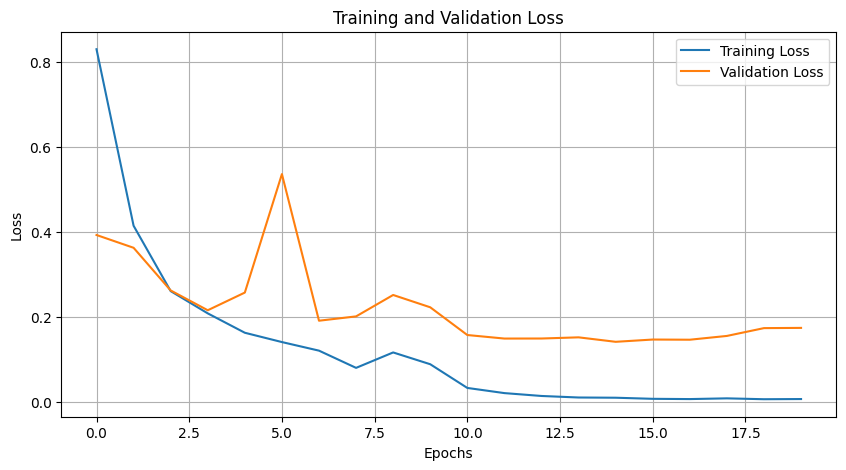

In [30]:
# Define classes
classes = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']  # Replace with your actual class names

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_losses, val_losses = train_model(epochs=20, device=device, train_loader=train_loader, val_loader=val_loader)

# Plot losses
plot_losses(train_losses, val_losses)



In [31]:
def evaluate_model(models, loader, device, classes):
    # Set each model in the list to evaluation mode
    for model in models:
        model.eval()
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in loader:
            inputs = batch['image'].to(device)
            labels = batch["label"].to(device, dtype=torch.long) 

            # Forward pass through each model and collect outputs
            outputs_list = [model(inputs) for model in models]

            # Fuzzy ensemble (ensure fuzzy_ensemble can handle multiple outputs)
            outputs = ensemble_model(*outputs_list)

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)


In [32]:
all_preds, all_labels = evaluate_model([vit_model, swin_model, efficientnet_model], val_loader, device, classes)

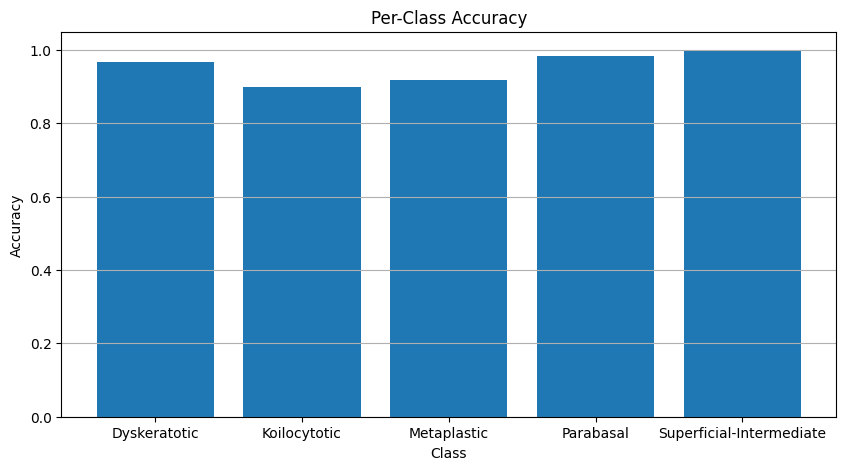

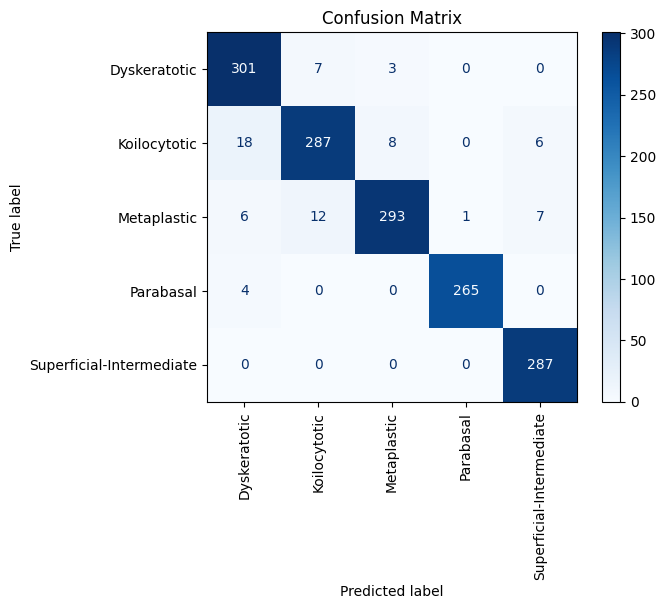

                          precision    recall  f1-score   support

            Dyskeratotic       0.91      0.97      0.94       311
            Koilocytotic       0.94      0.90      0.92       319
             Metaplastic       0.96      0.92      0.94       319
               Parabasal       1.00      0.99      0.99       269
Superficial-Intermediate       0.96      1.00      0.98       287

                accuracy                           0.95      1505
               macro avg       0.95      0.95      0.95      1505
            weighted avg       0.95      0.95      0.95      1505



In [33]:
# Evaluate the model


# Plot per-class accuracy
plot_per_class_accuracy(all_preds, all_labels, classes)

# Plot confusion matrix
plot_confusion_matrix(all_preds, all_labels, classes)


            
                
print_classification_report(all_preds, all_labels, classes)